### 1- import dataset

In [61]:
import pandas as pd

# Charger le dataset
df = pd.read_csv(r"C:\Users\DELL\Desktop\Study\Aoudjit\dataset\kaggle_Interests_group.csv")

# Aperçu du dataset
print(df.head())

  group  grand_tot_interests  interest1  interest2  interest3  interest4  \
0     C                   17        NaN        NaN        NaN        NaN   
1     C                   43        1.0        NaN        NaN        NaN   
2     C                   27        NaN        NaN        NaN        NaN   
3     C                   34        NaN        NaN        NaN        NaN   
4     C                   36        NaN        NaN        NaN        NaN   

   interest5  interest6  interest7  interest8  ...  interest208  interest209  \
0        NaN        NaN        NaN        NaN  ...          NaN          NaN   
1        1.0        NaN        NaN        NaN  ...          NaN          NaN   
2        NaN        NaN        NaN        NaN  ...          NaN          NaN   
3        NaN        NaN        NaN        NaN  ...          NaN          NaN   
4        1.0        NaN        NaN        NaN  ...          NaN          NaN   

   interest210  interest211  interest212  interest213  interes

In [62]:
# Remplacer les valeurs NaN par 0

data_cleaned = df.iloc[:, 2:].fillna(0)

###  Réduction de la dimensionnalité

- La réduction de dimensionnalité permet de simplifier un dataset en diminuant le nombre de variables (ou dimensions) 
- tout en conservant l'essentiel de l'information. Cela facilite la visualisation, réduit le bruit, améliore les performances 
- des algorithmes (comme K-means) et atténue les effets de la malédiction de la dimensionnalité.


In [63]:
from sklearn.decomposition import PCA

#si on met n_components = 2 ---> Réduire à 2 dimensions pour visualisation
pca = PCA(n_components=0.95) # Garde les composantes qui expliquent 95% de la variance
data_reduced = pca.fit_transform(data_cleaned)

# Vérifier la variance expliquée par les composantes principales
print(pca.explained_variance_ratio_)


[0.21031967 0.10434786 0.03203821 0.0260209  0.02277025 0.0193338
 0.01888441 0.01697984 0.01634896 0.01408041 0.01311056 0.01225403
 0.0120453  0.01139676 0.01094447 0.01064991 0.0103646  0.0102341
 0.00997079 0.00965231 0.00932315 0.00918426 0.00903629 0.00871998
 0.00854843 0.0084097  0.00826695 0.00808946 0.00795906 0.00775609
 0.0077176  0.00742108 0.00730173 0.00708949 0.00685175 0.00676768
 0.00661914 0.00655994 0.00625911 0.00617649 0.00603223 0.00588761
 0.00582186 0.00567902 0.00555369 0.00549635 0.00539912 0.00527365
 0.00522431 0.00512324 0.00510543 0.00492156 0.00485933 0.00468604
 0.00465211 0.00448229 0.00434551 0.00417302 0.00416063 0.00399888
 0.00386358 0.00385023 0.00381868 0.00371275 0.0036558  0.00353236
 0.00348384 0.00342123 0.00337489 0.00332798 0.00322908 0.00315666
 0.00310592 0.00297448 0.00290523 0.00283401 0.00282589 0.00274256
 0.00264508 0.00260142 0.00252056 0.00248379 0.00241053 0.00236173
 0.00227497 0.00226158 0.00212206 0.00203453 0.00193814 0.001884

##### Choisir le nombre de clusters (méthode du coude)

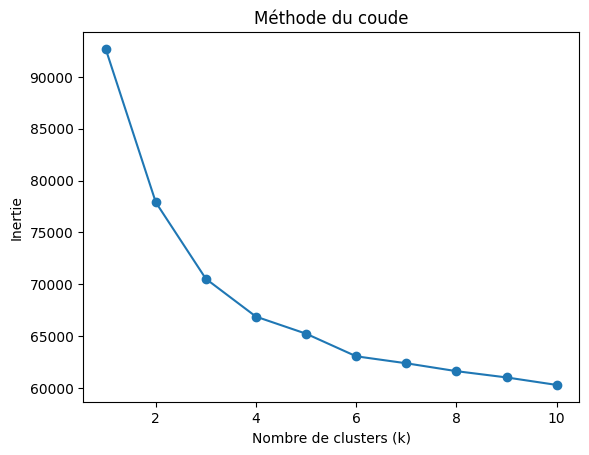

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_reduced)  # Utilise les données réduites ou normalisées
    inertia.append(kmeans.inertia_)

plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

##### Appliquer K-Means

In [65]:
# Appliquer K-means
k = 3  # Exemple basé sur la méthode du coude
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_reduced)

# Ajouter les labels de cluster au dataset
data_cleaned["Cluster"] = kmeans.labels_
print(data_cleaned.head())


   interest1  interest2  interest3  interest4  interest5  interest6  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        1.0        0.0        0.0        0.0        1.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        1.0        0.0   

   interest7  interest8  interest9  interest10  ...  interest209  interest210  \
0        0.0        0.0        0.0         0.0  ...          0.0          0.0   
1        0.0        0.0        0.0         0.0  ...          0.0          1.0   
2        0.0        0.0        0.0         0.0  ...          0.0          1.0   
3        0.0        0.0        0.0         0.0  ...          0.0          0.0   
4        0.0        0.0        0.0         0.0  ...          0.0          1.0   

   interest211  interest212  interest213  interest214  interest215  \
0          0.0  

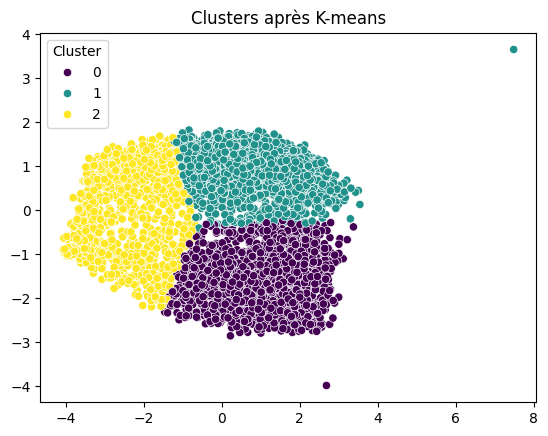

In [66]:
import seaborn as sns

sns.scatterplot(x=data_reduced[:, 0], y=data_reduced[:, 1], hue=data_cleaned["Cluster"], palette="viridis")
plt.title("Clusters après K-means")
plt.show()
